# Proyecto Statistical Learning I

In [23]:
import helpers.RegresionLineal as rl
import numpy as np
import pandas as pd
import random

### Importación data

In [24]:
data = np.load("./data/proyecto_training_data.npy")
data = pd.DataFrame(data, columns=['SalePrice', 'OverallQual', '1stFlrSF', 'TotRmsAbvGrd',
                         'YearBuilt', 'LotFrontage'])

data.head()

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
0,208500.0,7.0,856.0,8.0,2003.0,65.0
1,181500.0,6.0,1262.0,6.0,1976.0,80.0
2,223500.0,7.0,920.0,6.0,2001.0,68.0
3,140000.0,7.0,961.0,7.0,1915.0,60.0
4,250000.0,8.0,1145.0,9.0,2000.0,84.0


### Regresión Lineal

##### Creación del objeto

In [25]:
regresion = rl.RegresionLineal(data, "SalePrice")

#### Análisis exploratorio

In [26]:
regresion.AnalisisExploratorio()

           SalePrice  OverallQual     1stFlrSF  TotRmsAbvGrd    YearBuilt  \
count    1460.000000  1460.000000  1460.000000   1460.000000  1460.000000   
mean   180921.195890     6.099315  1162.626712      6.517808  1971.267808   
std     79442.502883     1.382997   386.587738      1.625393    30.202904   
min     34900.000000     1.000000   334.000000      2.000000  1872.000000   
25%    129975.000000     5.000000   882.000000      5.000000  1954.000000   
50%    163000.000000     6.000000  1087.000000      6.000000  1973.000000   
75%    214000.000000     7.000000  1391.250000      7.000000  2000.000000   
max    755000.000000    10.000000  4692.000000     14.000000  2010.000000   

       LotFrontage  
count  1201.000000  
mean     70.049958  
std      24.284752  
min      21.000000  
25%      59.000000  
50%      69.000000  
75%      80.000000  
max     313.000000  


#### Histogramas

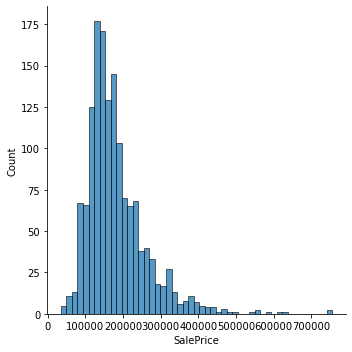

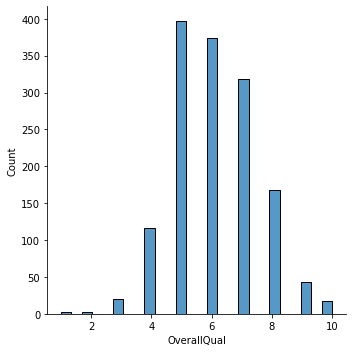

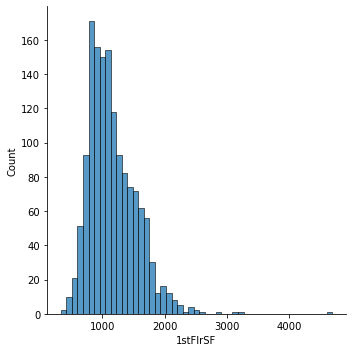

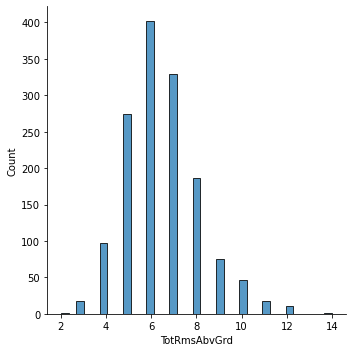

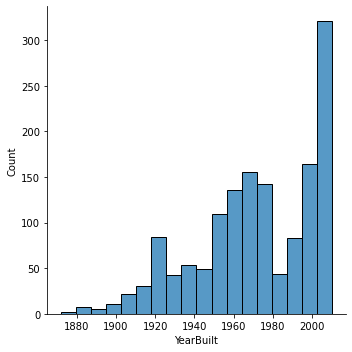

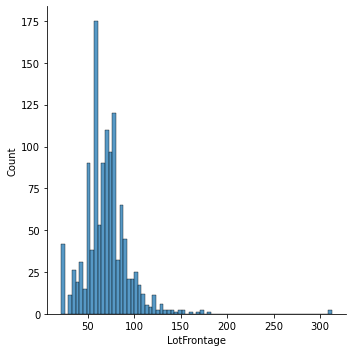

In [27]:
regresion.GenerarHistogramas()

#### Análisis Variables Independientes

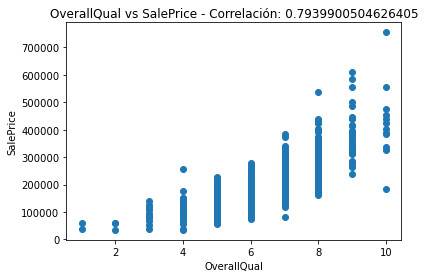

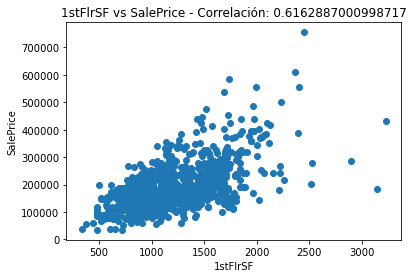

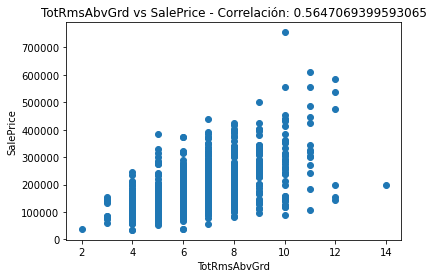

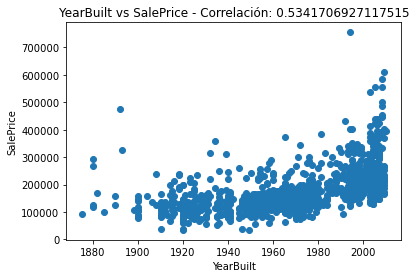

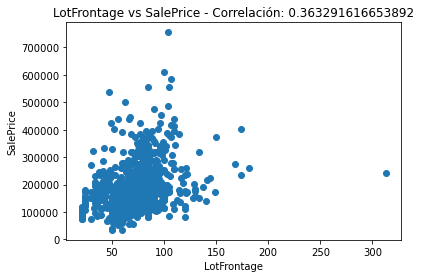

In [28]:
regresion.AnalisisVariablesIndependientes()

##### Selección de variables
- Utilizando la correlación para la selección de variables, se obtiene que las 2 variables con la mejor correlación son: OverallQual y 1stFlrSF

In [29]:
variable1 = "OverallQual"
variable2 = "1stFlrSF"

#### Entrenamiento manual del modelo

In [30]:
learningRate = 0.001

##### OverallQual

In [31]:
modelosVariable1, erroresVariable1 = regresion.Entrenar(regresion.ObtenerColumna(regresion.target),regresion.ObtenerColumna(variable1), 15, 3, learningRate)

Iteración = 0, Error = 19409722053.22175
Iteración = 3, Error = 16025281095.318182
Iteración = 6, Error = 13377237498.256598
Iteración = 9, Error = 11305353487.184101
Iteración = 12, Error = 9684258531.44218


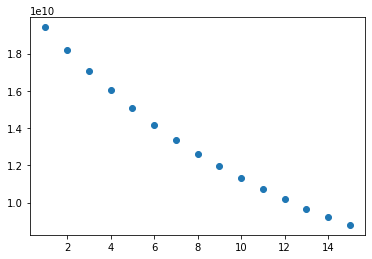

In [32]:
regresion.VisualizacionError(erroresVariable1)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


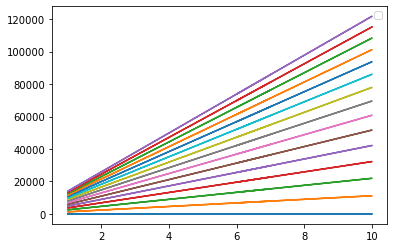

Datos entrenamiento

        0
0     7.0
1     6.0
2     7.0
3     7.0
4     8.0
...   ...
1163  4.0
1164  5.0
1165  7.0
1166  8.0
1167  6.0

[1168 rows x 1 columns]
Fin Datos entrenamiento


In [33]:
regresion.VisualizacionDelModelo(modelosVariable1, 1, variable1)

##### 1stFlrSF

In [34]:
modelosVariable2, erroresVariable2 = regresion.Entrenar(regresion.ObtenerColumna(regresion.target),regresion.ObtenerColumna(variable2), 15, 3, learningRate)

Iteración = 0, Error = 19409722053.22175
Iteración = 3, Error = 1.524687287960095e+29
Iteración = 6, Error = 1.57445164704608e+48
Iteración = 9, Error = 1.6258402680084413e+67
Iteración = 12, Error = 1.6789061652271902e+86


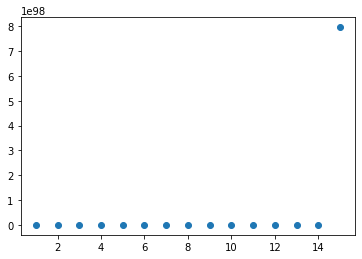

In [35]:
regresion.VisualizacionError(erroresVariable2)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


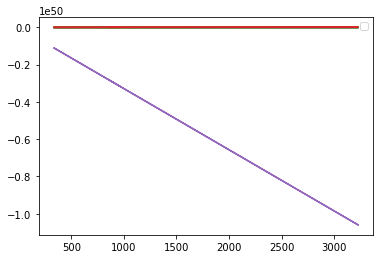

Datos entrenamiento

           0
0      856.0
1     1262.0
2      920.0
3      961.0
4     1145.0
...      ...
1163  1258.0
1164  1432.0
1165  1502.0
1166  1694.0
1167   959.0

[1168 rows x 1 columns]
Fin Datos entrenamiento


In [36]:
regresion.VisualizacionDelModelo(modelosVariable2, 1, variable2)

#### Entrenamiento Sklearn

In [37]:
modeloSklearnVariable1 = regresion.EntrenarSklearn(variable1)
print("beta 1:")
print(modeloSklearnVariable1.coef_)
print("beta 0:")
print(modeloSklearnVariable1.intercept_)

beta 1:
[[45411.99877916]]
beta 0:
[-96469.57131874]


In [38]:
modeloSklearnVariable2 = regresion.EntrenarSklearn(variable2)
print("beta 1:")
print(modeloSklearnVariable2.coef_)
print("beta 0:")
print(modeloSklearnVariable2.intercept_)

beta 1:
[[129.95124229]]
beta 0:
[30324.58517496]


##### Predicciones

In [39]:
prediccionManual1, prediccionSklearn1, prediccionPromedio1 = regresion.Predicciones(modelosVariable1[0], modeloSklearnVariable1, random.sample(range(10), 10))

In [40]:
print("Predicicón Modelo Manual")
print(prediccionManual1)
print("Predicicón Modelo Sklearn")
print(prediccionSklearn1)
print("Predicicón Promedio")
print(prediccionPromedio1)

Predicicón Modelo Manual
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]
Predicicón Modelo Sklearn
[[130590.42257706]
 [221414.42013537]
 [176002.42135622]
 [266826.41891453]
 [-96469.57131874]
 [312238.41769369]
 [ 85178.4237979 ]
 [-51057.57253958]
 [ 39766.42501874]
 [ -5645.57376042]]
Predicicón Promedio
[[ 65295.21128853]
 [110707.21006769]
 [ 88001.21067811]
 [133413.20945727]
 [-48234.78565937]
 [156119.20884685]
 [ 42589.21189895]
 [-25528.78626979]
 [ 19883.21250937]
 [ -2822.78688021]]


In [41]:
prediccionManual2, prediccionSklearn2, prediccionPromedio2 = regresion.Predicciones(modelosVariable1[0], modeloSklearnVariable1, random.sample(range(800,4000), 10))

In [42]:
print("Predicicón Modelo Manual")
print(prediccionManual2)
print("Predicicón Modelo Sklearn")
print(prediccionSklearn2)
print("Predicicón Promedio")
print(prediccionPromedio2)

Predicicón Modelo Manual
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]
Predicicón Modelo Sklearn
[[1.15022947e+08]
 [4.26816333e+07]
 [3.84583174e+07]
 [7.11095445e+07]
 [1.59117998e+08]
 [7.26989645e+07]
 [9.48146079e+07]
 [1.56892810e+08]
 [9.34976599e+07]
 [5.38983970e+07]]
Predicicón Promedio
[[57511473.66692486]
 [21340816.63932459]
 [19229158.69609369]
 [35554772.2572014 ]
 [79558999.07420662]
 [36349482.23583669]
 [47407303.93856195]
 [78446405.10411723]
 [46748829.95626414]
 [26949198.48855075]]


#### Test

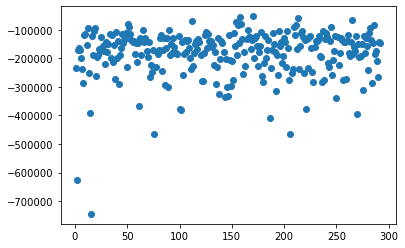

In [43]:
regresion.PrediccionesTest(variable1, modelosVariable1[0])

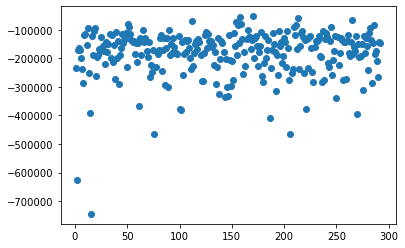

In [44]:
regresion.PrediccionesTest(variable2, modelosVariable1[0])